In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv('heart.csv')

x = df[['restecg', 'chol']]
y = df['target'] 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [41]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)

rf.fit(xtrain, ytrain)
ada.fit(xtrain, ytrain)

rf_train_acc = rf.score(xtrain, ytrain)
rf_test_acc = rf.score(xtest, ytest)
ada_train_acc = ada.score(xtrain, ytrain)
ada_test_acc = ada.score(xtest, ytest)

# Voting Classifier = Soft Voting
voting_soft = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada)],
    voting='soft'
)
voting_soft.fit(xtrain, ytrain)
voting_acc = voting_soft.score(xtest, ytest)

print(f"Random Forest -> Train: {rf_train_acc:.3f}, Test: {rf_test_acc:.3f}")
print(f"AdaBoost      -> Train: {ada_train_acc:.3f}, Test: {ada_test_acc:.3f}")
print(f"Soft Voting Test Accuracy: {voting_acc:.3f}")


Random Forest -> Train: 0.884, Test: 0.839
AdaBoost      -> Train: 0.617, Test: 0.556
Soft Voting Test Accuracy: 0.844


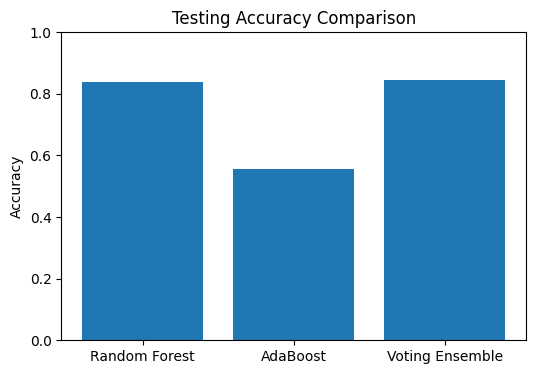

In [42]:
models = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_acc = [rf_train_acc, ada_train_acc, None]
test_acc = [rf_test_acc, ada_test_acc, voting_acc]

plt.figure(figsize=(6,4))
plt.bar(models, test_acc)
plt.title('Testing Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()